# Importing the libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics 
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

# Importing the dataset

In [28]:
data = pd.read_csv("weatherAUS.csv")

# Analyze the data

In [29]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [30]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,75001.000000,75175.000000,73884.000000,37280.000000,30464.000000,69991.000000,74732.000000,74118.000000,74292.000000,73864.000000,65523.000000,65576.000000,46036.000000,45078.000000,74632.000000,74150.000000
mean,11.271084,22.257790,2.360311,5.212366,7.327101,40.245032,13.952858,18.564532,71.145978,52.196022,1018.249551,1015.881810,4.619472,4.700963,15.808057,20.808707
std,6.226131,6.935675,8.293909,4.149631,3.842799,14.389752,9.420504,9.390574,17.848594,20.730859,7.106027,6.979618,2.906949,2.691976,6.050791,6.743509
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000
25%,6.800000,17.500000,0.000000,2.400000,4.400000,30.000000,7.000000,11.000000,59.000000,37.000000,1013.500000,1011.200000,1.000000,2.000000,11.500000,16.300000
50%,11.400000,21.800000,0.000000,4.400000,8.100000,39.000000,13.000000,17.000000,72.000000,52.000000,1018.300000,1016.000000,6.000000,5.000000,16.000000,20.400000
75%,16.100000,26.600000,0.600000,7.000000,10.400000,48.000000,19.000000,24.000000,85.000000,66.000000,1023.000000,1020.600000,7.000000,7.000000,20.300000,25.000000
max,31.900000,47.300000,371.000000,145.000000,14.500000,135.000000,130.000000,83.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.700000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76113 entries, 0 to 76112
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           76113 non-null  object 
 1   Location       76113 non-null  object 
 2   MinTemp        75001 non-null  float64
 3   MaxTemp        75175 non-null  float64
 4   Rainfall       73884 non-null  float64
 5   Evaporation    37280 non-null  float64
 6   Sunshine       30464 non-null  float64
 7   WindGustDir    69983 non-null  object 
 8   WindGustSpeed  69991 non-null  float64
 9   WindDir9am     69197 non-null  object 
 10  WindDir3pm     73308 non-null  object 
 11  WindSpeed9am   74732 non-null  float64
 12  WindSpeed3pm   74118 non-null  float64
 13  Humidity9am    74292 non-null  float64
 14  Humidity3pm    73864 non-null  float64
 15  Pressure9am    65523 non-null  float64
 16  Pressure3pm    65576 non-null  float64
 17  Cloud9am       46036 non-null  float64
 18  Cloud3

In [32]:
data.shape

(76113, 23)

In [33]:
data.duplicated().sum()

0

In [34]:
data.nunique()

Date             3436
Location           26
MinTemp           375
MaxTemp           500
Rainfall          546
Evaporation       290
Sunshine          144
WindGustDir        16
WindGustSpeed      64
WindDir9am         16
WindDir3pm         16
WindSpeed9am       42
WindSpeed3pm       42
Humidity9am        97
Humidity3pm       100
Pressure9am       497
Pressure3pm       493
Cloud9am           10
Cloud3pm            9
Temp9am           424
Temp3pm           500
RainToday           2
RainTomorrow        2
dtype: int64

In [35]:
#target count

data.RainTomorrow.value_counts()

No     57577
Yes    16307
Name: RainTomorrow, dtype: int64

# Visualization

In [36]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

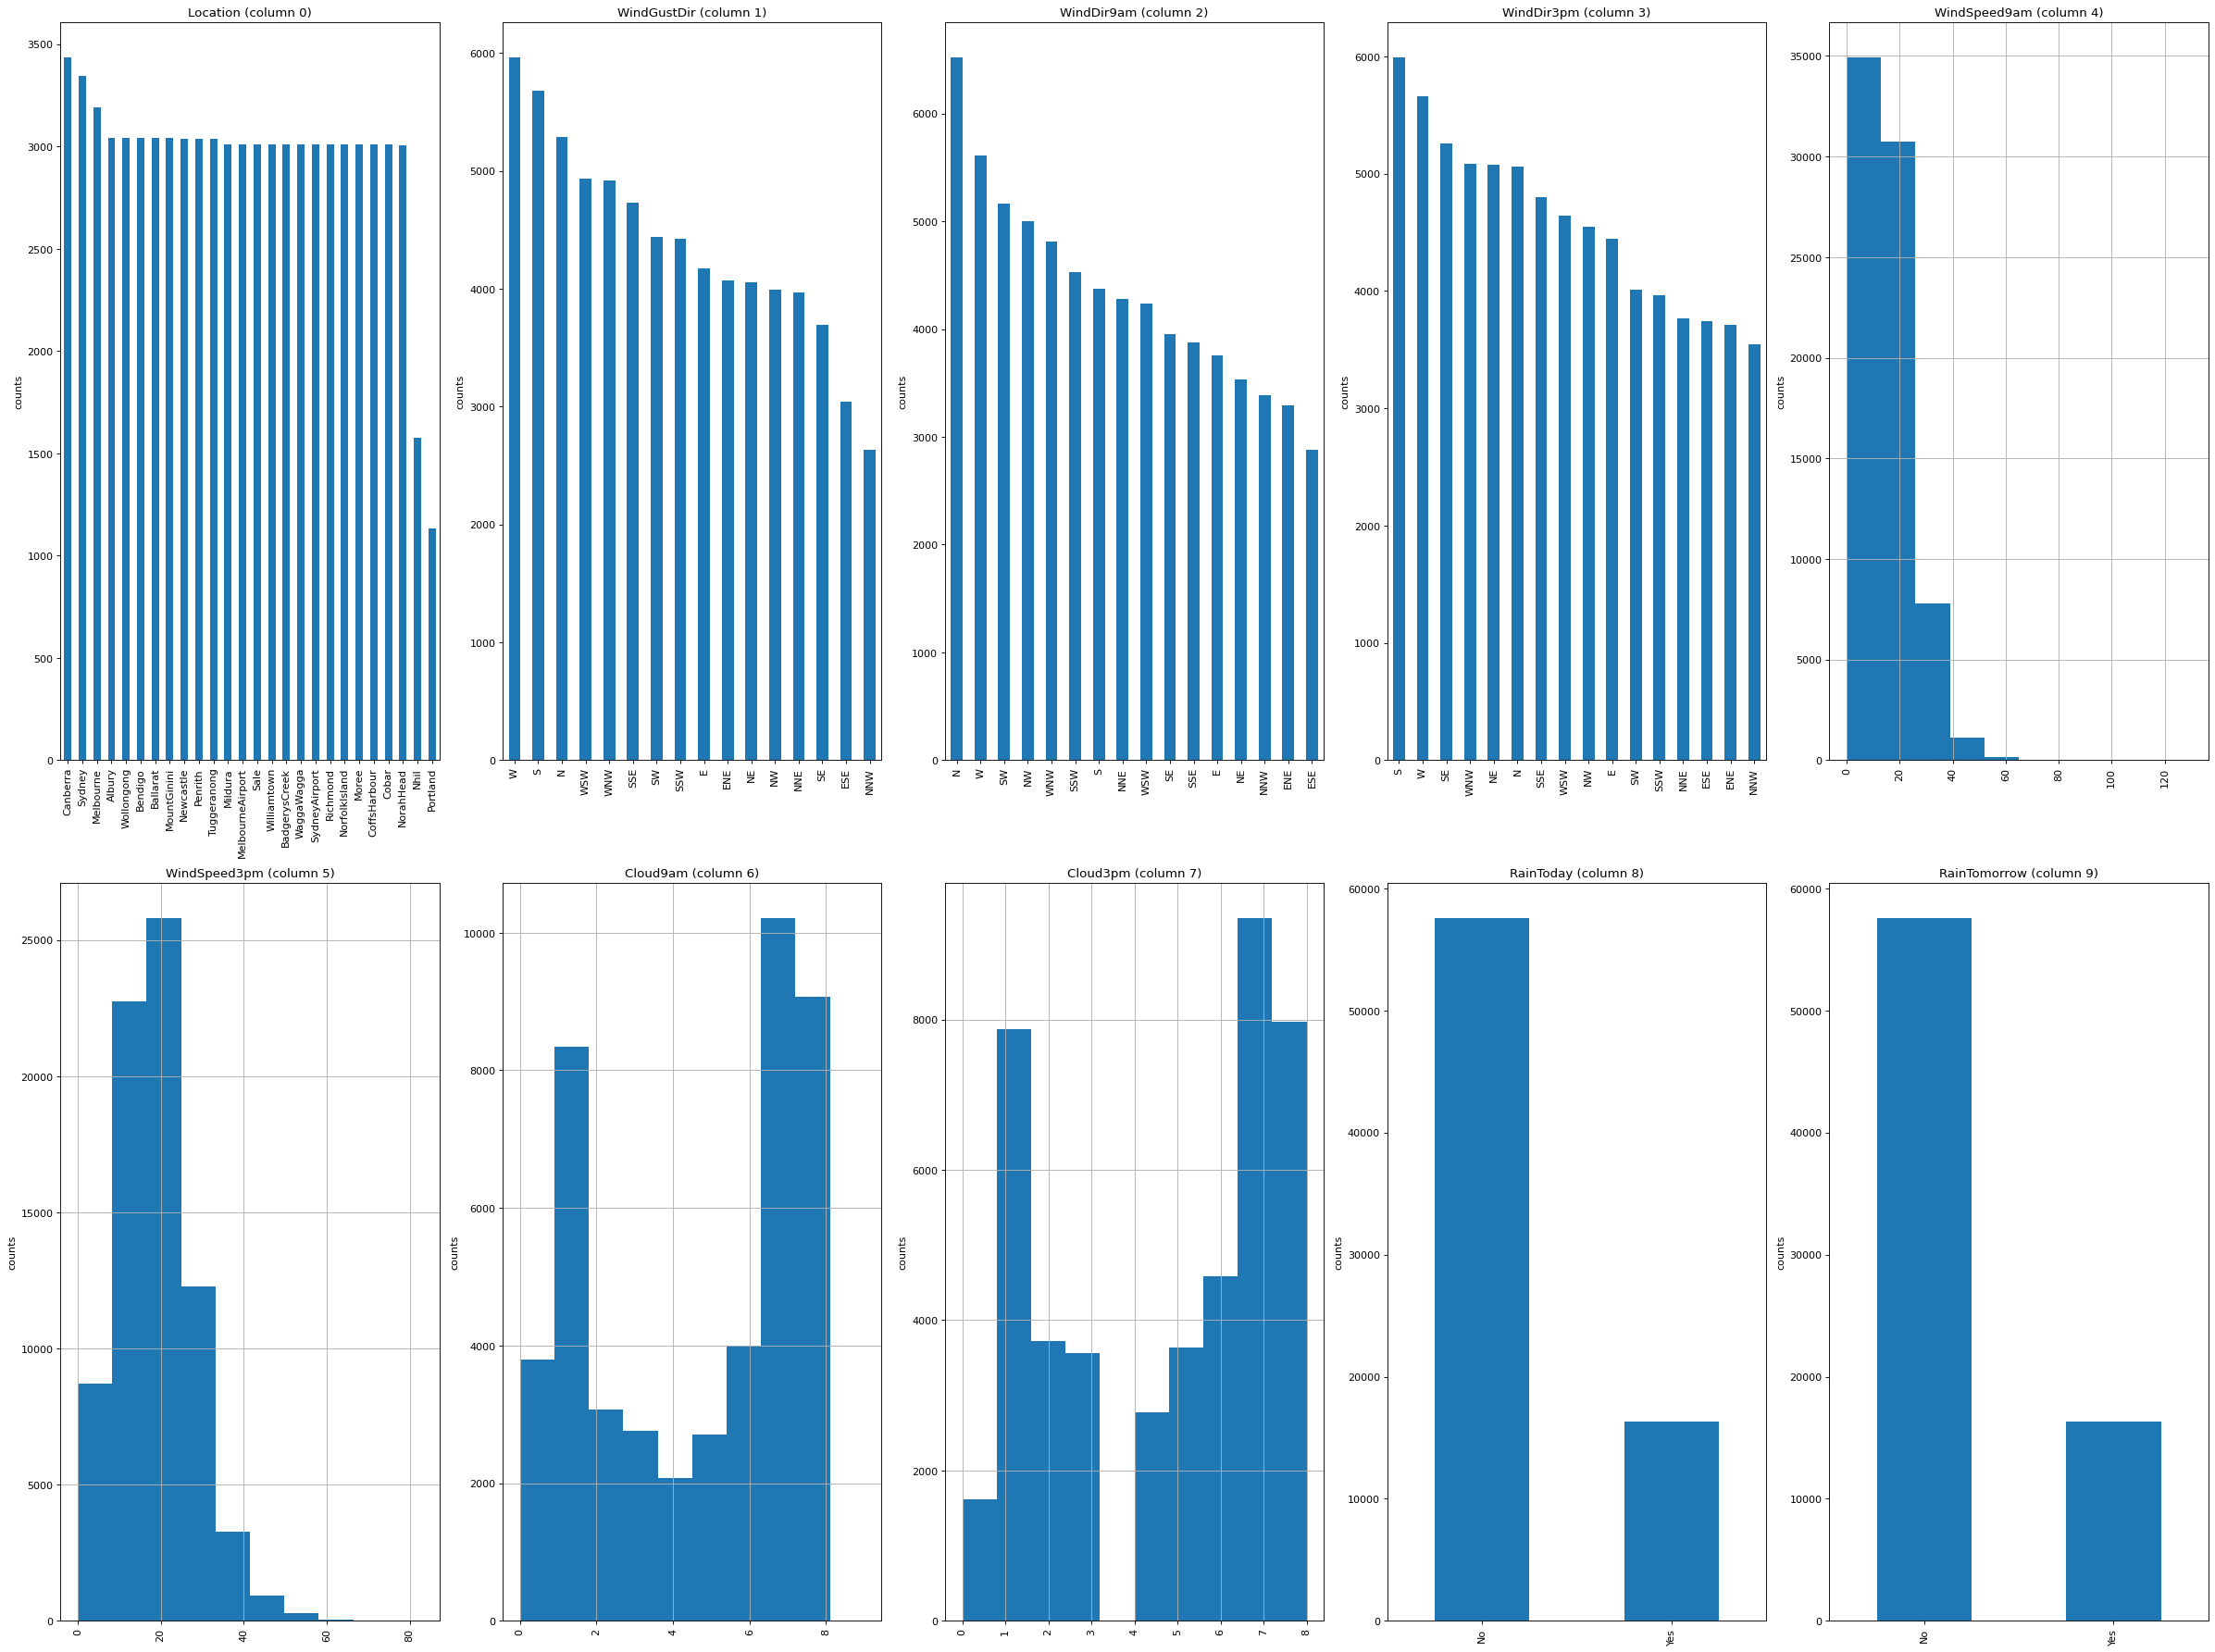

In [37]:
plotPerColumnDistribution(data, 10, 5)

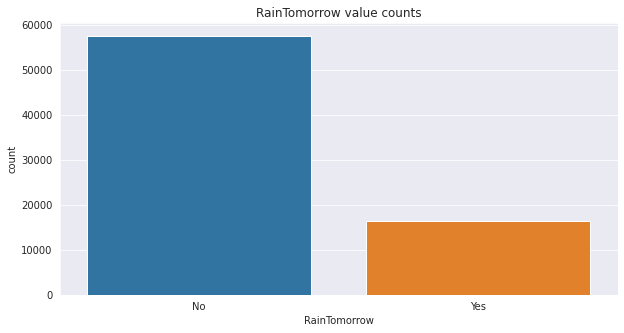

In [38]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
plt.title('RainTomorrow value counts')
sns.countplot(x=data["RainTomorrow"]);

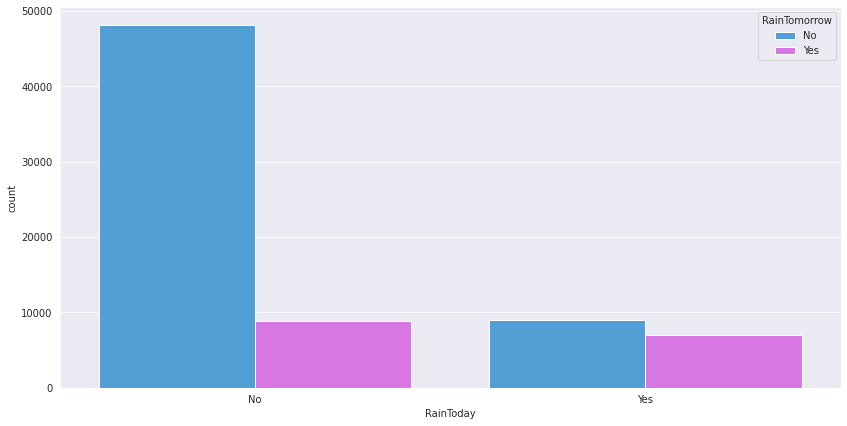

In [39]:
plt.figure(figsize=(14,7))
sns.countplot(x=data["RainToday"], hue=data["RainTomorrow"], palette=sns.color_palette("husl")[4:]);

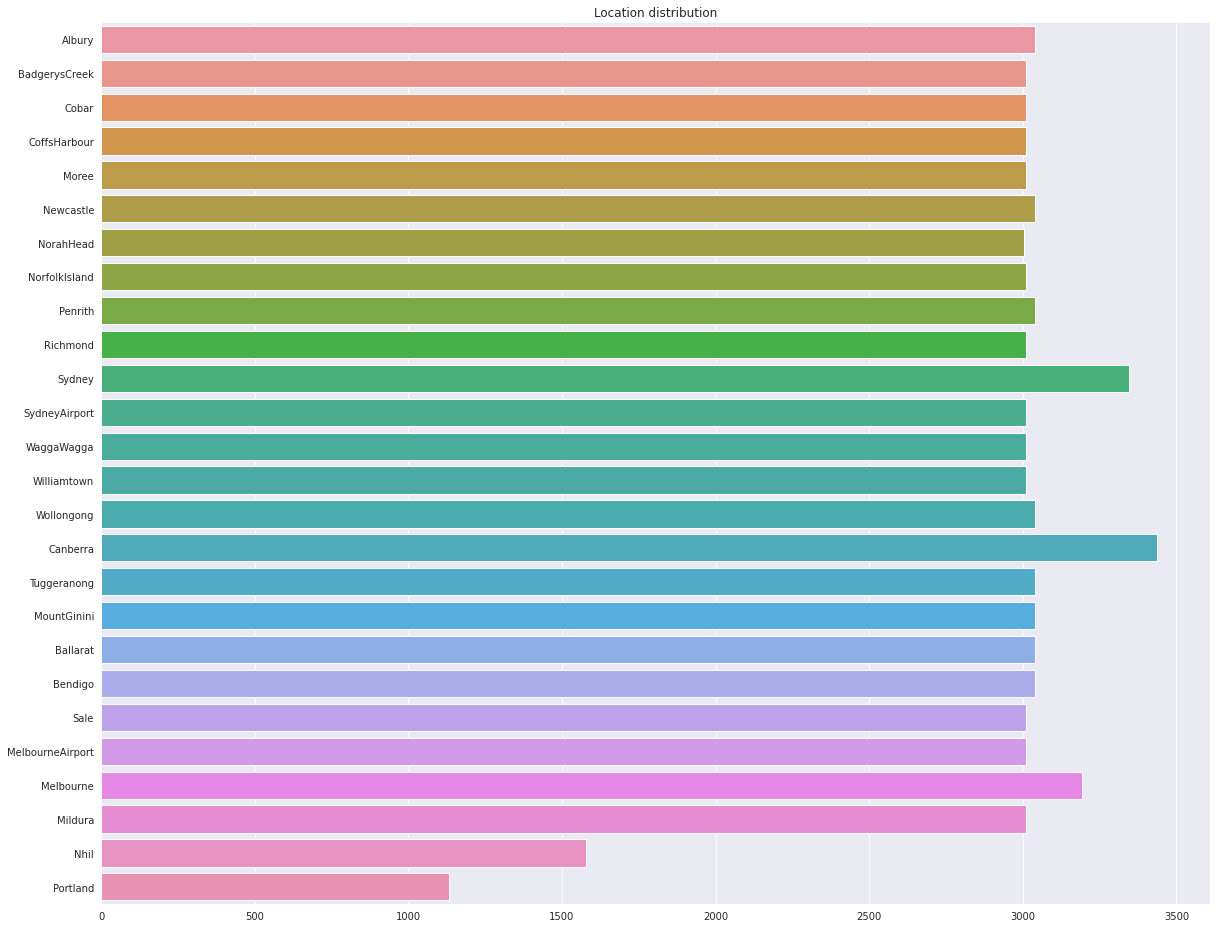

In [40]:
plt.figure(figsize=(17,13))
sns.countplot(data=data, y='Location')

plt.title('Location distribution')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

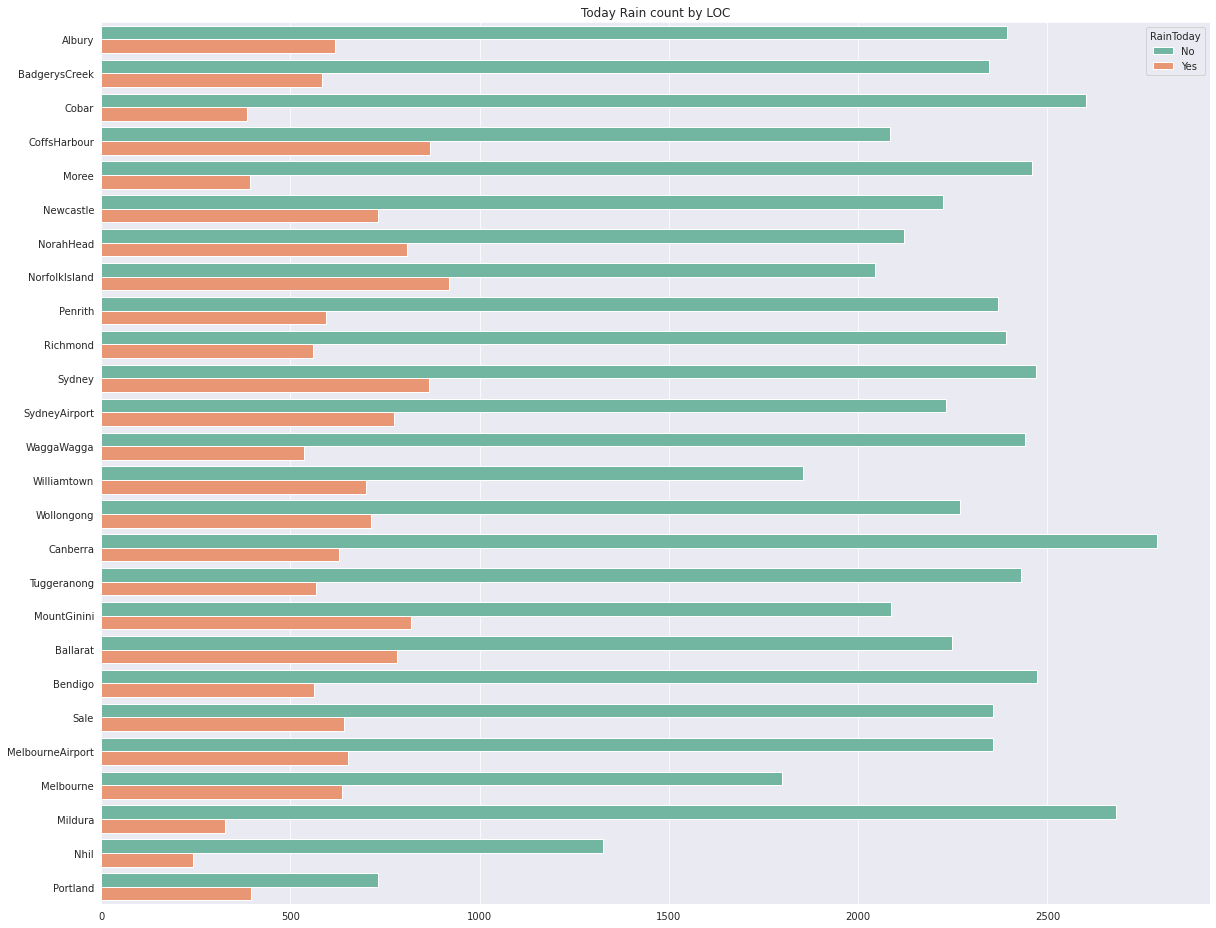

In [41]:
plt.figure(figsize=(17,13))
sns.countplot(data=data, y='Location', hue="RainToday", palette=sns.color_palette("Set2"))

plt.title('Today Rain count by LOC')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

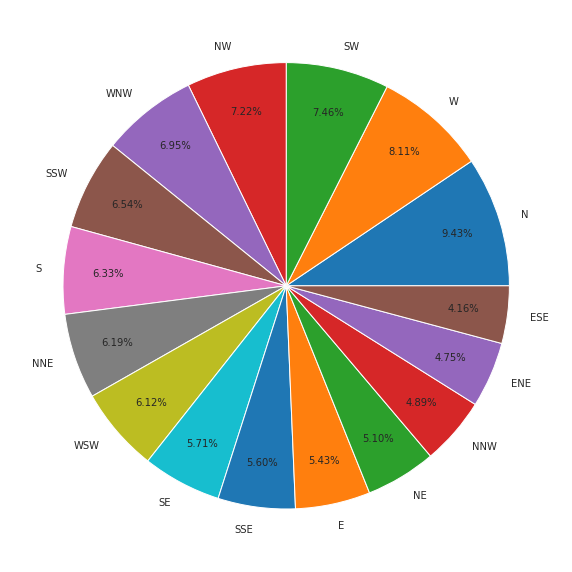

In [42]:
plt.figure(figsize=(10,11))
plt.pie(data["WindDir9am"].value_counts(),
        labels=list(data["WindDir9am"].value_counts().index),
        autopct='%1.2f%%',
        pctdistance=0.8,
       );

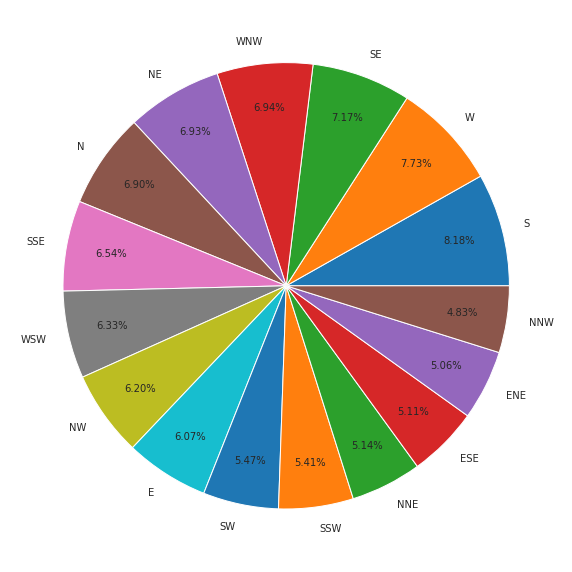

In [43]:
plt.figure(figsize=(10,11))
plt.pie(data["WindDir3pm"].value_counts(),
        labels=list(data["WindDir3pm"].value_counts().index),
        autopct='%1.2f%%',
        pctdistance=0.8,
       );

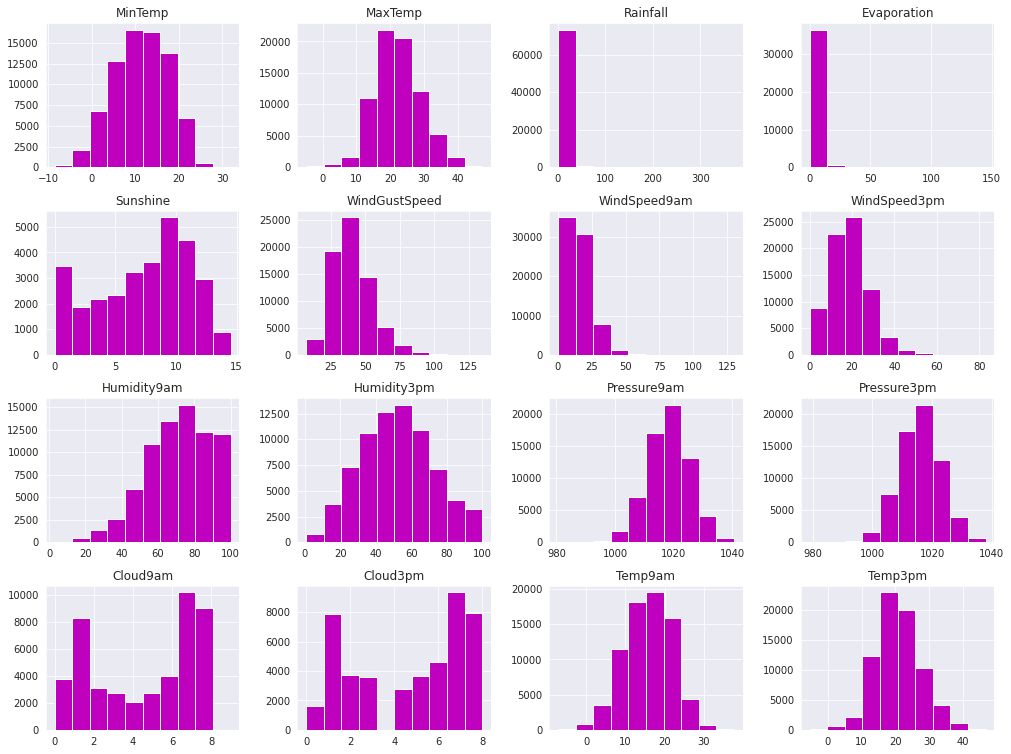

In [44]:
data.hist(figsize=(17,13), color="m");

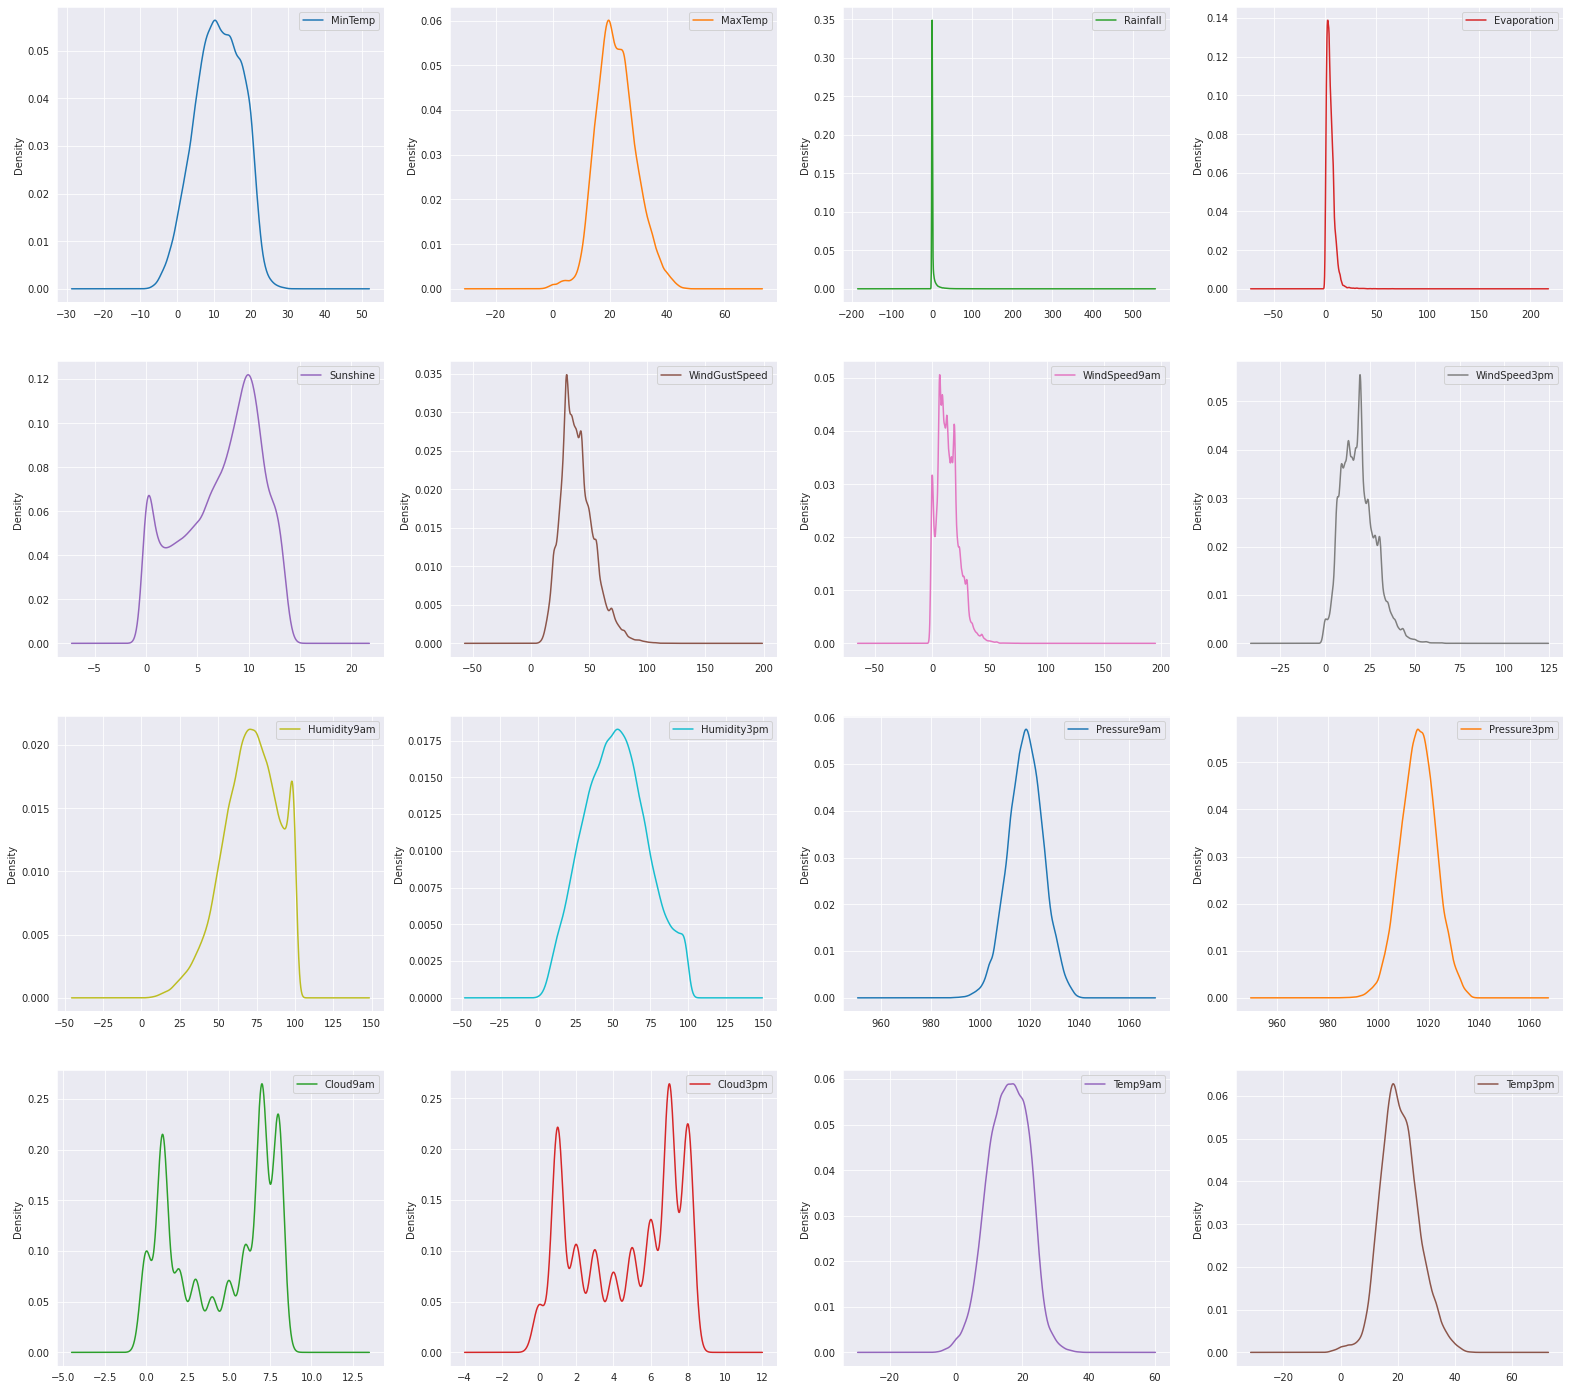

In [45]:
data.plot(kind="kde", subplots=True, layout=(4,4), figsize=(27,25),sharex=False, sharey=False);

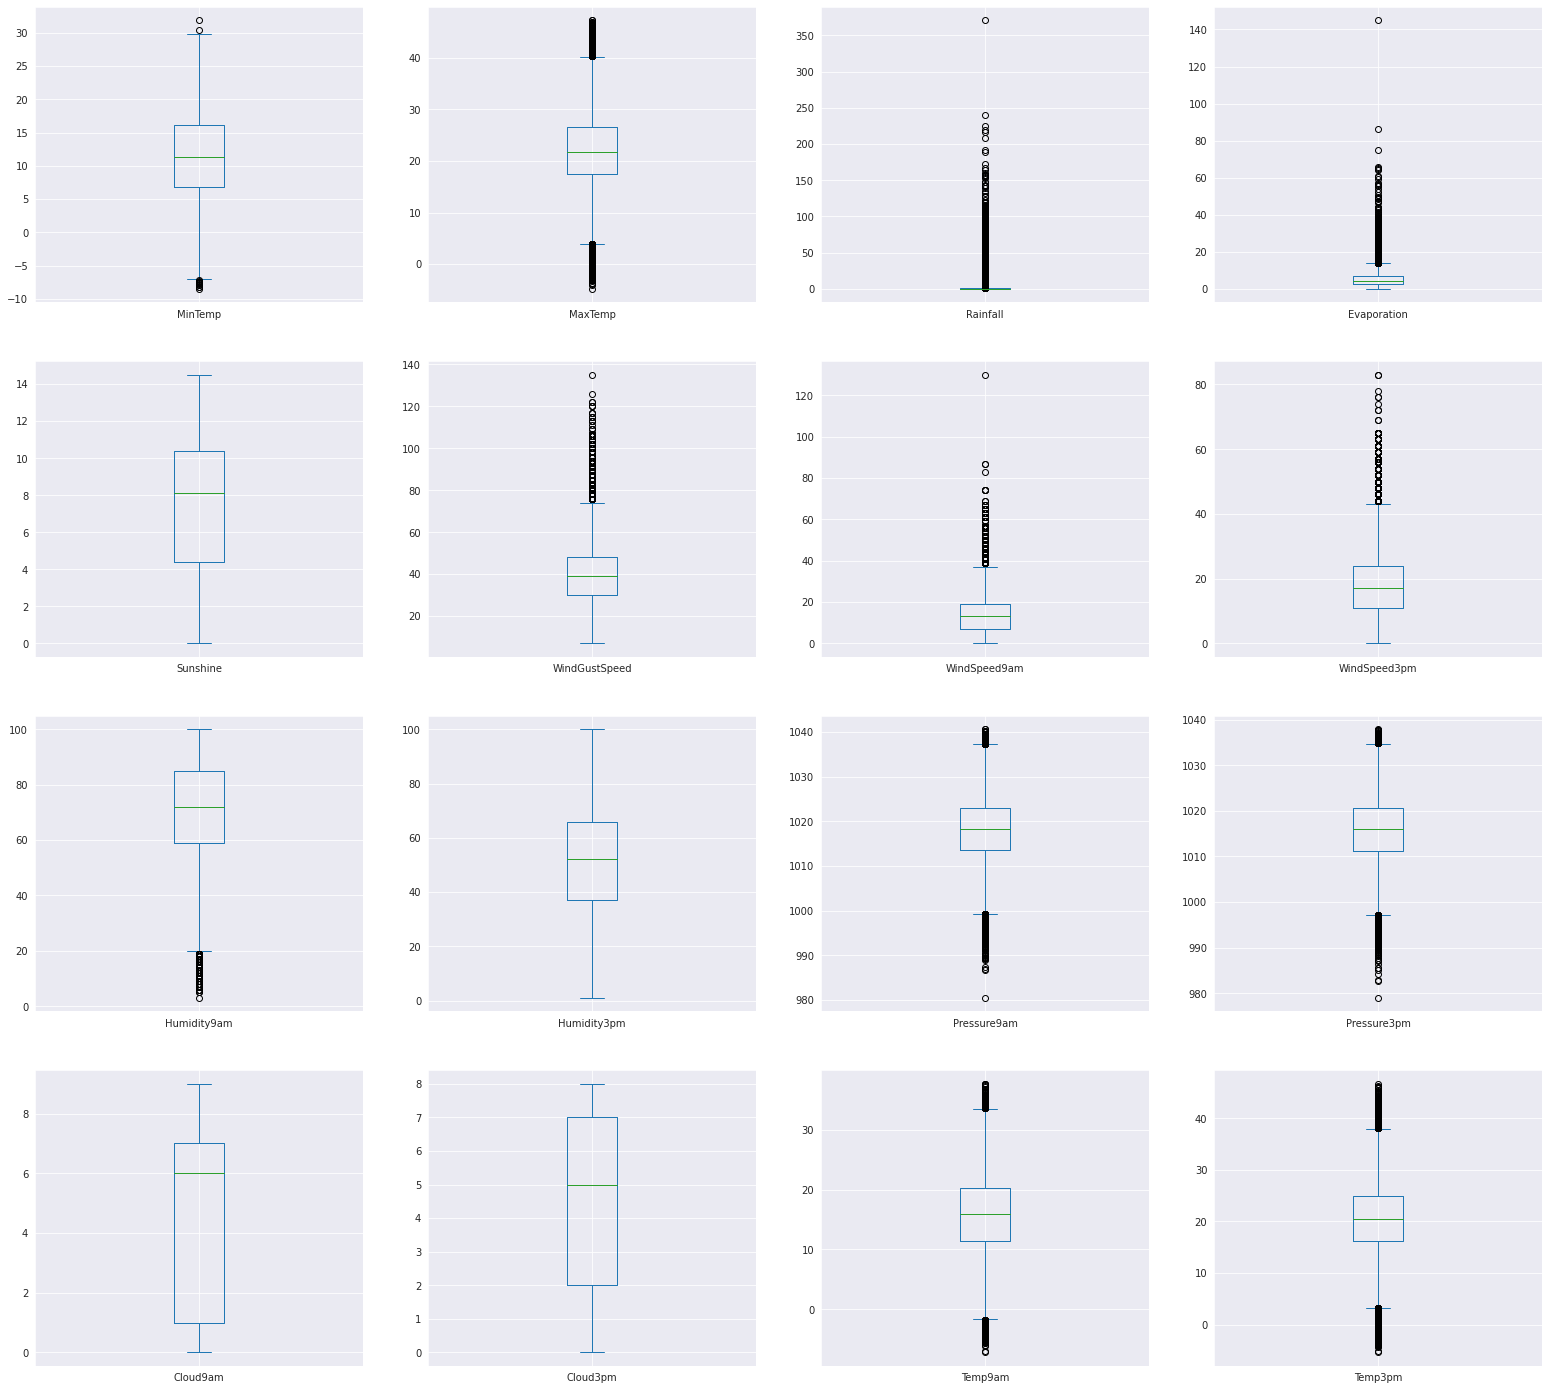

In [46]:
data.plot(kind="box", subplots=True, layout=(4,4), figsize=(27,25),sharex=False, sharey=False);